## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score 
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [3]:
from joblib import load, dump

## Data source

https://www.kaggle.com/datasets/sid321axn/heart-statlog-cleveland-hungary-final

Heart disease is also known as Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year which is about 32% of all deaths globally. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease, and other conditions. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age.

We have curated this dataset by combining different datasets already available independently but not combined before. W have combined them over 11 common features which makes it the largest heart disease dataset available for research purposes. The five datasets used for its curation are:


    Cleveland: 303
    Hungarian: 294
    Switzerland: 123
    Long Beach VA: 200
    Stalog (Heart) Data Set: 270

Total 1190

## Data loading

In [4]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

## Dataset

In [5]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
df.shape
# 1190 wierszy
# 12 column

(1190, 12)

In [7]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [8]:
# age: Patient's Age in years (Numeric)
# sex Patient's Gender Male as 1 Female as 0 (Nominal)
# chest pain type: Type of chest pain categorized into:
#    1 typical angina, 2 atypical angina, 3 non-anginal pain, 4 asymptomatic
# resting bp s: Level of blood pressure at resting mode in mm/HG (Numerical)
# cholesterol: Serum cholestrol in mg/dl (Numeric)
# fasting blood sugar:
#    Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false
# resting ecg
#    result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal, 1: Abnormality in
# max heart rate
#    Maximum heart rate achieved (Numeric)
# exercise angina
#    Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
# oldpeak
#    Exercise induced ST-depression in comparison with the state of rest (Numeric)
# taget: no heart disease: 0, heart disease: 1

## Data preparation

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=55)

In [11]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [12]:
y = df['target']
features_columns = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']
X = df[features_columns]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [46]:
df['resting bp s'].describe()

count    1190.000000
mean      132.153782
std        18.368823
min         0.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: resting bp s, dtype: float64

In [47]:
df['cholesterol'].describe()

count    1190.000000
mean      210.363866
std       101.420489
min         0.000000
25%       188.000000
50%       229.000000
75%       269.750000
max       603.000000
Name: cholesterol, dtype: float64

In [48]:
df['max heart rate'].describe()

count    1190.000000
mean      139.732773
std        25.517636
min        60.000000
25%       121.000000
50%       140.500000
75%       160.000000
max       202.000000
Name: max heart rate, dtype: float64

In [49]:
df['oldpeak'].describe()

count    1190.000000
mean        0.922773
std         1.086337
min        -2.600000
25%         0.000000
50%         0.600000
75%         1.600000
max         6.200000
Name: oldpeak, dtype: float64

## Model 1

In [14]:
model = RandomForestClassifier()

In [15]:
model.fit(X_train, y_train)

RandomForestClassifier()

### Ocena

In [16]:
cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')

array([0.91194969, 0.90536278, 0.88328076])

In [17]:
y_train_pred = cross_val_predict(model, X_train, y_train, cv=3)

In [18]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[393,  53],
       [ 39, 467]], dtype=int64)

In [19]:
# Precision
# TP / (TP + FP)
precision_score(y_train, y_train_pred)

0.8980769230769231

In [20]:
# Recall
# TP / (TP / FN)
recall_score(y_train, y_train_pred)

0.9229249011857708

In [21]:
# F1 score (harminic mean of precision and recall)
f1_score(y_train, y_train_pred)

0.9103313840155945

In [22]:
y_probabilities = cross_val_predict(model, X_train, y_train, cv=3, method='predict_proba')

In [23]:
y_scores = y_probabilities[:, 1]

In [24]:
prec_forest, recall_forest, thresholds_forest = precision_recall_curve(y_train, y_scores)

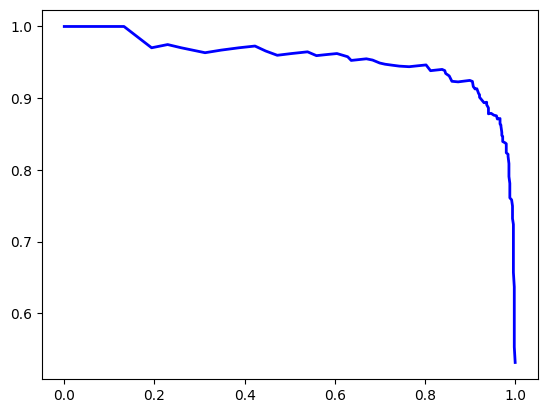

In [25]:
plt.plot(recall_forest, prec_forest, "b-", linewidth=2, label="Random Forest")
plt.show()

In [26]:
dump(model, 'model_health1.pkl')

['model_health1.pkl']

## Model 2

In [27]:
from sklearn.linear_model import SGDClassifier

In [28]:
model2 = SGDClassifier(random_state=55)

In [29]:
model2.fit(X_train, y_train)

SGDClassifier(random_state=55)

In [30]:
cross_val_score(model2, X_train, y_train, cv=3, scoring='accuracy')

array([0.6163522 , 0.5362776 , 0.61198738])

In [31]:
y_train_pred_2 = cross_val_predict(model2, X_train, y_train, cv=3)

In [32]:
confusion_matrix(y_train, y_train_pred_2)

array([[279, 167],
       [225, 281]], dtype=int64)

## Model 3

In [33]:
df['chest pain type'].value_counts()

chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64